IMPORTING LIBRARIES

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LOADING AND READING THE FILE

In [116]:
movie_data = pd.read_csv("AnnualTicketSales.csv",thousands=',')
x_data = movie_data
movie_data.pop('Unnamed: 5')
movie_data.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16
1,2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16
2,2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16
3,2018,1311536128,"$11,948,096,650","$12,013,670,952",$9.11
4,2017,1225639761,"$10,993,991,460","$11,226,860,216",$8.97


CLEANING THE DATA

In [117]:
movie_data['TOTAL BOX OFFICE'] = movie_data['TOTAL BOX OFFICE'].str.replace('$','')
movie_data['TOTAL BOX OFFICE'] = movie_data['TOTAL BOX OFFICE'].str.replace(',','')
movie_data['TOTAL INFLATION ADJUSTED BOX OFFICE']= movie_data['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','')
movie_data['TOTAL INFLATION ADJUSTED BOX OFFICE']= movie_data['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',','')
movie_data['AVERAGE TICKET PRICE'] = movie_data['AVERAGE TICKET PRICE'].str.replace('$','')

C:\Users\gutti\AppData\Local\Temp/ipykernel_9264/2978508047.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\gutti\AppData\Local\Temp/ipykernel_9264/2978508047.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\gutti\AppData\Local\Temp/ipykernel_9264/2978508047.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



HEAD OF THE DATA

In [118]:
movie_data.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


TAIL OF THE DATA

In [119]:
movie_data.tail()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
22,1999,1444664086,7338894852,13233123027,5.08
23,1998,1443832471,6771575283,13225505439,4.69
24,1997,1357349648,6230235770,12433322785,4.59
25,1996,1305221290,5769078886,11955781912,4.42
26,1995,1221705907,5314421390,11190826105,4.35


MODIFYING THE DATA

In [120]:
modified_year = movie_data['YEAR'].astype(float)
modified_tickets_sold = movie_data['TICKETS SOLD'].astype(float)
modified_total_box_office = movie_data['TOTAL BOX OFFICE'].astype(float)
modified_avg_tick_price = movie_data['AVERAGE TICKET PRICE'].astype(float)
modified_inflation = movie_data['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(float)

TICKETS SOLD v/s YEAR

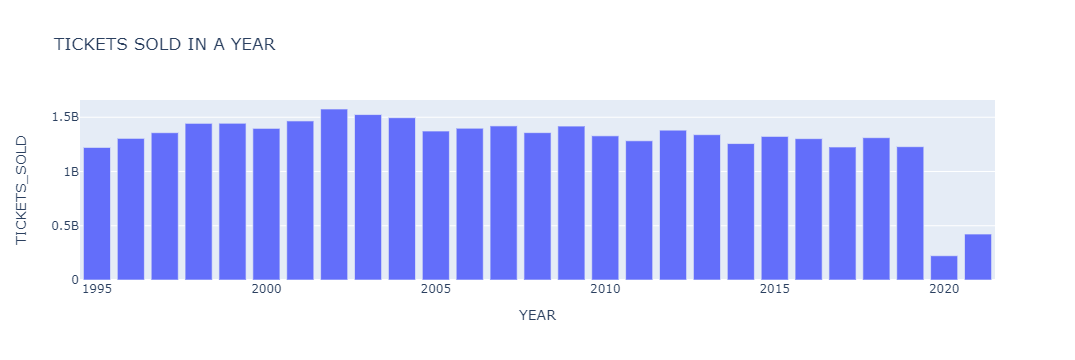

In [121]:
first_data = pd.DataFrame(dict(YEAR=(modified_year),TICKETS_SOLD=(modified_tickets_sold)))
first_graph=px.bar(first_data,x="YEAR",y="TICKETS_SOLD",title='TICKETS SOLD IN A YEAR')
first_graph.show()

WHAT IF THERE WAS NO PANDEMIC?

In [122]:
training_set = movie_data[2:26]
training_set_x = training_set['YEAR']
training_set_y = training_set['TICKETS SOLD']
tr_x = training_set_x.to_numpy()
tr_y = training_set_y.to_numpy()

In [123]:
LR = LinearRegression()
df= tr_x.reshape(-1, 1)
LR.fit(df,tr_y)

LinearRegression()

In [124]:
y_test_ = pd.Series([2020,2021])
y_test = y_test_.to_numpy()
y_df = y_test.reshape(-1,1)
y_prediction =  LR.predict(y_df)

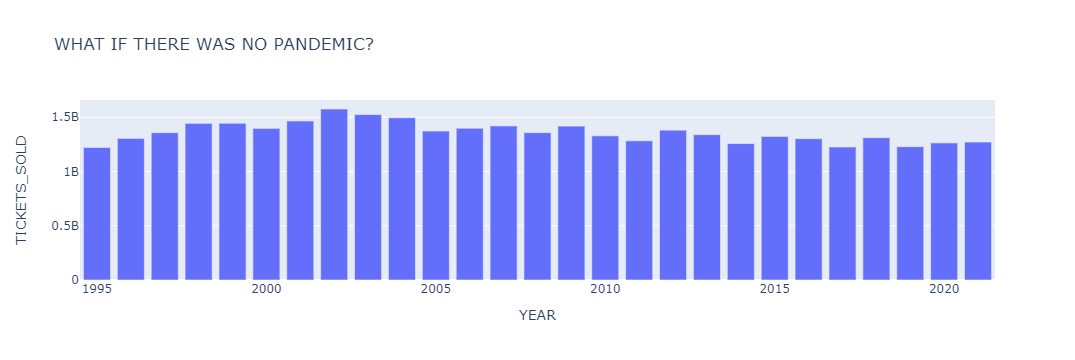

In [125]:
plot_prediction = modified_tickets_sold
plot_x = modified_year
plot_prediction[0] = y_prediction[0]
plot_prediction[1] = y_prediction[1]
first_data_pred = pd.DataFrame(dict(YEAR=(modified_year),TICKETS_SOLD=(plot_prediction)))
first_graph_pred=px.bar(first_data_pred,x="YEAR",y="TICKETS_SOLD",title='WHAT IF THERE WAS NO PANDEMIC?')
first_graph_pred.show()
# px.bar(plot_x,plot_prediction)

BOX OFFICE v/s YEAR

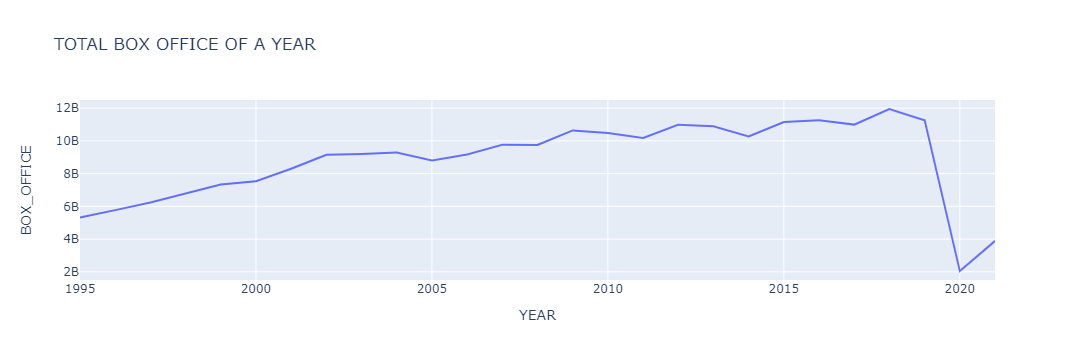

In [126]:
second_data = pd.DataFrame(dict(YEAR = modified_year , BOX_OFFICE = modified_total_box_office))
second_graph = px.line(second_data,x="YEAR",y="BOX_OFFICE",title="TOTAL BOX OFFICE OF A YEAR")
second_graph.show()

WHAT WOULD THE BOX OFFICE WOULD LOOK LIKE IF IT WASN'T FOR CORONA

In [127]:
tr_box_x = training_set['YEAR']
tr_box_y = training_set['TOTAL BOX OFFICE']
tr_x_box = tr_box_x.to_numpy()
tr_y_box = tr_box_y.to_numpy()

In [128]:
lr = LinearRegression()
df_x = tr_x_box.reshape(-1,1)
lr.fit(df_x,tr_y_box)

LinearRegression()

In [129]:
y_to_pred =pd.Series([2020,2021])
y_pr = y_to_pred.to_numpy()
y_df_y=y_pr.reshape(-1,1)
box_predi = lr.predict(y_df_y)

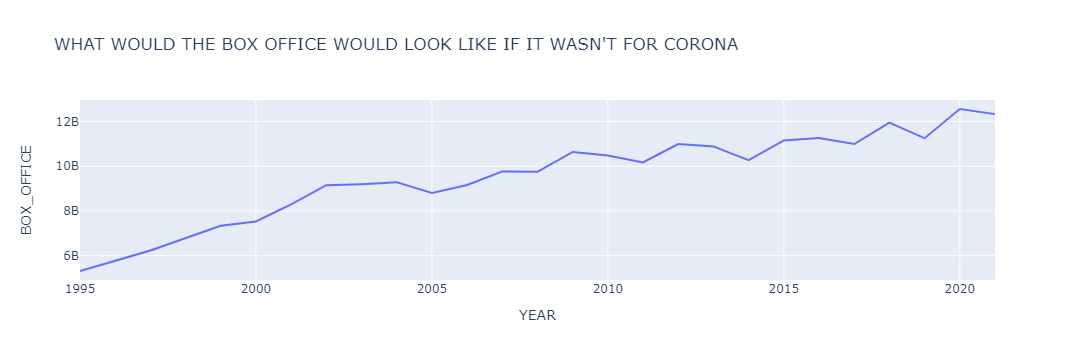

In [130]:
pred_box_office = modified_total_box_office
pred_box_office[0] = box_predi[0]
pred_box_office[1] = box_predi[1]
second_data_pred = pd.DataFrame(dict(YEAR = modified_year , BOX_OFFICE = pred_box_office))
second_graph_pred = px.line(second_data_pred,x="YEAR",y="BOX_OFFICE",title="WHAT WOULD THE BOX OFFICE WOULD LOOK LIKE IF IT WASN'T FOR CORONA")
second_graph_pred.show()

AVERAGE TICKET PRICE vs YEAR

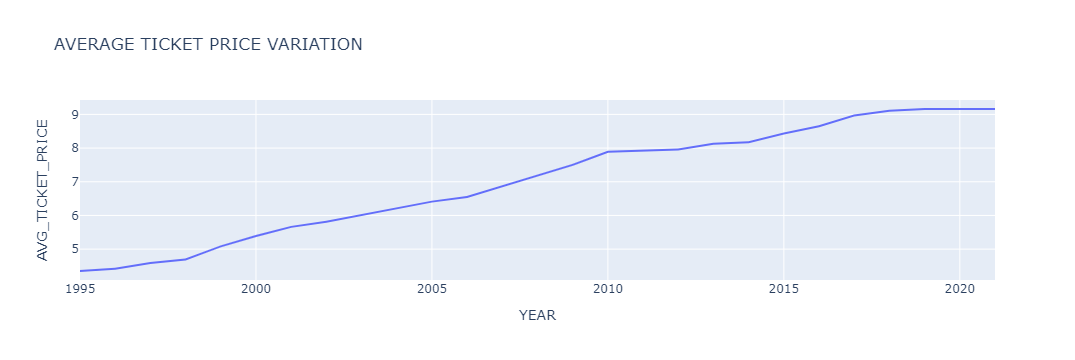

In [131]:
third_data = pd.DataFrame(dict(YEAR = modified_year , AVG_TICKET_PRICE = modified_avg_tick_price))
third_graph = px.line(third_data,x="YEAR",y="AVG_TICKET_PRICE",title="AVERAGE TICKET PRICE VARIATION")
third_graph.show()

PREDICTION REPEAT !!!

In [132]:
avg_x = training_set['YEAR']
avg_y = training_set['AVERAGE TICKET PRICE']
avg_x_pred = avg_x.to_numpy()
avg_y_pred= avg_y.to_numpy()
df_xx=avg_x_pred.reshape(-1,1)
lr.fit(df_xx,avg_y_pred)
# avg_x_pr = avg_x.to_numpy(

LinearRegression()

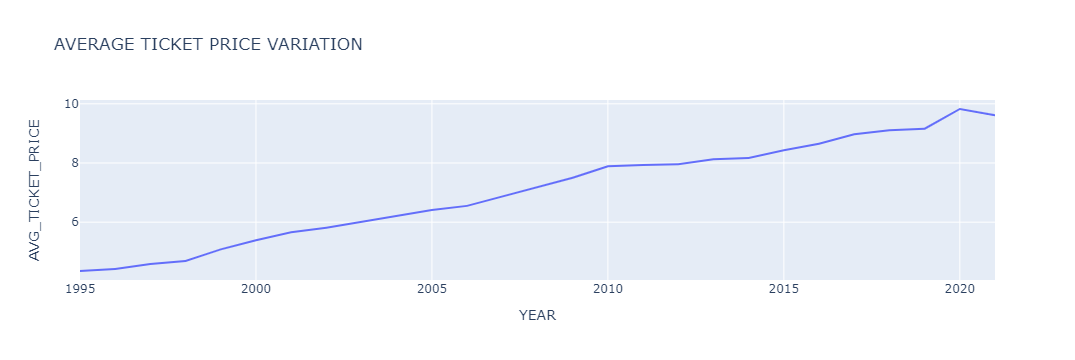

In [133]:
avg_to_pred = np.array([[2020],[2021]])
avg_predicted_box=lr.predict(avg_to_pred)
pred_avg_ticket = modified_avg_tick_price 
pred_avg_ticket[0] = avg_predicted_box[0]
pred_avg_ticket[1] = avg_predicted_box[1]
third_data_pred = pd.DataFrame(dict(YEAR = modified_year , AVG_TICKET_PRICE = pred_avg_ticket))
third_graph_pred = px.line(third_data_pred,x="YEAR",y="AVG_TICKET_PRICE",title="AVERAGE TICKET PRICE VARIATION IF IT WASN'T FOR CORONA")
third_graph_pred.show()

INFLATION RATE OF THE BOX OFFICE

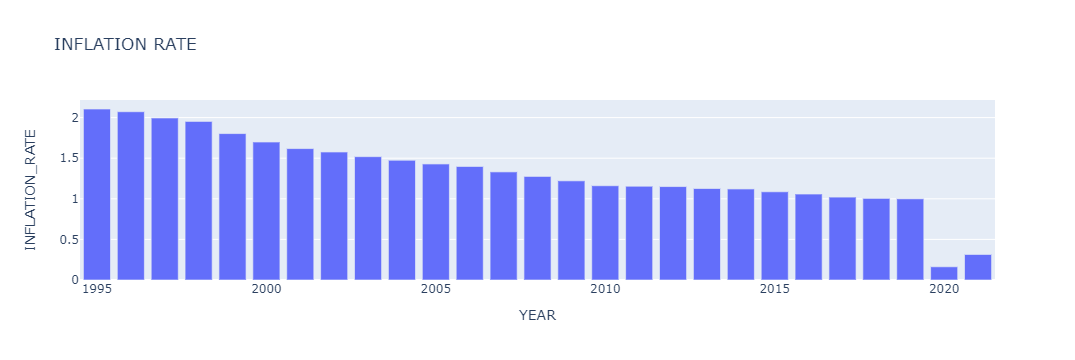

In [134]:
inflation_rate = modified_inflation / modified_total_box_office
fourth_data = pd.DataFrame(dict(YEAR = modified_year,INFLATION_RATE=inflation_rate))
fourth_graph = px.bar(fourth_data,x="YEAR",y="INFLATION_RATE",title="INFLATION RATE")
fourth_graph.show()

In [135]:
inf_rate_x = training_set['YEAR']
inf_rate_y = training_set['TOTAL INFLATION ADJUSTED BOX OFFICE']
inf_x = inf_rate_x.to_numpy()
inf_y = inf_rate_y.to_numpy()
inf_pred_x = inf_x.reshape(-1,1)
lr.fit(inf_pred_x,inf_y)
inf_to_pred = np.array([[2020],[2021]])
inf_predicted = lr.predict(inf_to_pred)

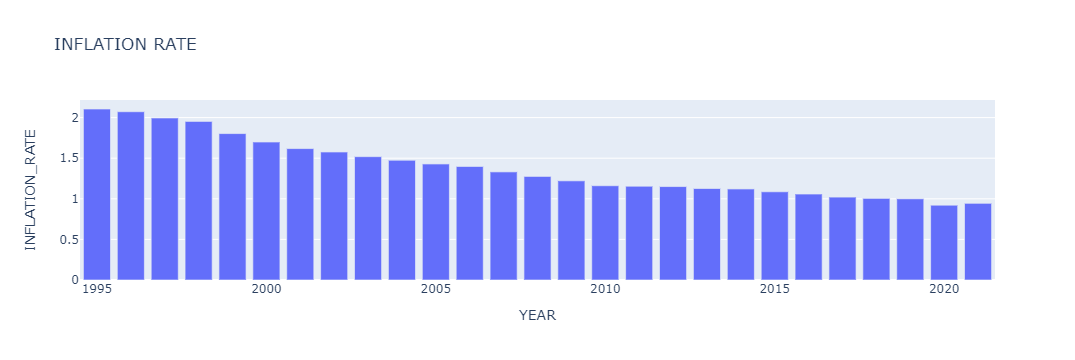

In [136]:
inflation_pred = modified_inflation
inflation_pred[0] = inf_predicted[0]
inflation_pred[1] = inf_predicted[1]
inflation_rate_pred = inflation_pred / pred_box_office
fourth_data_pred = pd.DataFrame(dict(YEAR = modified_year,INFLATION_RATE=inflation_rate_pred ))
fourth_graph_pred = px.bar(fourth_data_pred,x="YEAR",y="INFLATION_RATE",title="WHAT IF...")
fourth_graph_pred.show()